In [1]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

In [2]:
import scipy.io

In [3]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    img_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            img_name.append(filename)
    return images, img_name

In [4]:
imgs, img_name = load_images_from_folder('stimuli')

In [5]:
img_name

['67.jpg',
 '1587.jpg',
 '1458.jpg',
 '91.jpg',
 '1397.jpg',
 '121.jpg',
 '1324.jpg',
 '1153.jpg',
 '1597.jpg',
 '1143.jpg',
 '1039.jpg',
 '1400.jpg',
 '1209.jpg',
 '75.jpg',
 '1480.jpg',
 '1093.jpg',
 '1267.jpg',
 '1227.jpg',
 '2.jpg',
 '1109.jpg',
 '1558.jpg',
 '1385.jpg',
 '22.jpg',
 '56.jpg',
 '1118.jpg',
 '1078.jpg',
 '1532.jpg',
 '1416.jpg',
 '79.jpg',
 '1485.jpg',
 '1471.jpg',
 '95.jpg',
 '20.jpg',
 '1042.jpg',
 '1262.jpg',
 '1288.jpg',
 '15.jpg',
 '128.jpg',
 '72.jpg',
 '117.jpg',
 '1413.jpg',
 '1266.jpg',
 '1234.jpg',
 '125.jpg',
 '1293.jpg',
 '147.jpg',
 '1557.jpg',
 '11.jpg',
 '1645.jpg',
 '1239.jpg',
 '1394.jpg',
 '151.jpg',
 '010.jpg',
 '1559.jpg',
 '36.jpg',
 '1065.jpg',
 '1337.jpg',
 '1294.jpg',
 '17.jpg',
 '143.jpg',
 '1022.jpg',
 '1016.jpg',
 '60.jpg',
 '98.jpg',
 '1448.jpg',
 '1224.jpg',
 '139.jpg',
 '1149.jpg',
 '1455.jpg',
 '76.jpg',
 '1654.jpg',
 '1438.jpg',
 '152.jpg',
 '1329.jpg',
 '1249.jpg',
 '1383.jpg',
 '1642.jpg',
 '102.jpg',
 '27.jpg',
 '1363.jpg',
 '1108.j

In [6]:
len(img_name)

300

In [ ]:
int(img_name[0].split('.')[0])

In [ ]:
scipy.io.loadmat('S02_fix/S02_face_1.mat')['currImData'][:,4]

In [ ]:
scipy.io.loadmat('S02_fix/S02_face_1.mat')['currImData'][:,5]

In [ ]:
scipy.io.loadmat('S02_fix/S02_pareidolia_64.mat')

In [ ]:
for filename in os.listdir('S02_fix'):
    print(filename)

In [ ]:
def load_fix_from_folder(folder):
    fix_X = []
    fix_Y = []
    img_name = []
    for filename in os.listdir(folder):
        fix_X.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,4])
        fix_Y.append(scipy.io.loadmat(os.path.join(folder,filename))['currImData'][:,5])
        img_name.append(str(scipy.io.loadmat(os.path.join(folder,filename))['currImName'][0][0]) + '.jpg')
        #print(filename)
        #print(img_name)
    return fix_X, fix_Y, img_name

In [ ]:
fix_X, fix_Y, img_name = load_fix_from_folder('S_fix/S13_fix')

In [ ]:
import glob
import os

# Specify the directory containing the nested folder structure
root_dir = '/home/pranjul/DeepGaze/fix_stimuli/'

# Specify the image file extensions you want to load
extensions = ['*.jpg', '*.jpeg', '*.png']

# Create a list to store the image file paths
image_paths = []

# Traverse through all subdirectories and search for image files
for extension in extensions:
    search_pattern = os.path.join(root_dir, '**', extension)
    image_paths.extend(glob.glob(search_pattern, recursive=True))

# Print the paths of the loaded image files
for image_path in image_paths:
    print(image_path)


In [ ]:
import os

def create_folder(folder_path):
    try:
        os.mkdir(folder_path)
        print(f"Folder '{folder_path}' created successfully.")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

In [ ]:
import os

def folder_exists(folder_path):
    return os.path.exists(folder_path) and os.path.isdir(folder_path)



In [ ]:
# Replace 'path/to/your/folder' with the folder path you want to check
folder_path = 'S_fix/S18_fix'
if folder_exists(folder_path):
    print(f"Folder '{folder_path}' exists.")
else:
    print(f"Folder '{folder_path}' does not exist.")


In [ ]:
for f in range(13, 56):
    print(f)
    print('S_fix/S'+ str(f) +'_fix')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

x = {}
for q in range(1, 10):
    
    # Replace 'path/to/your/folder' with the folder path you want to check
    folder_path = 'S_fix/S0'+ str(q) +'_fix'
    if folder_exists(folder_path):
    
        fix_X, fix_Y, img_name = load_fix_from_folder('S_fix/S0'+ str(q) +'_fix')

        # Replace 'path/to/your/folder' with the desired folder path
        folder_path = 'DG3_heatmaps/S0'+ str(q) +'_fix'
        create_folder(folder_path)


        for i in range(len(img_name)):

            image = cv2.imread('/home/pranjul/DeepGaze/fix_stimuli/' + img_name[i])

            if image is not None and len(fix_X[i]) > 3 and len(fix_Y[i] > 3):

                # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
                #fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
                #fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

                #print(img_name[i])

                fixation_history_x = fix_X[i]/3
                #print(fixation_history_x)
                fixation_history_y = fix_Y[i]/3

                # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
                # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
                # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
                centerbias_template = np.load('centerbias_mit1003.npy')
                
                # rescale to match image size
                centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
                # renormalize log density
                centerbias -= logsumexp(centerbias)

                image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
                centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
                x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
                y_hist_tensor = torch.tensor([fixation_history_y[model.included_fixations]]).to(DEVICE)

                log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

                # Scale factor
                #scale_factor = 3

                # Calculate the new width and height
                #new_width = image.shape[1] * scale_factor
                #new_height = image.shape[0] * scale_factor

                # Resize the image using cv2.resize()
                #image = cv2.resize(image, (new_width, new_height))

                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


                f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
                axs[0].imshow(image)
                #axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                #axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
                axs[0].set_axis_off()
                axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
                #axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
                #axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
                axs[1].set_axis_off()
                plt.savefig(os.path.join('DG3_heatmaps/S0'+ str(q) +'_fix', img_name[i]))
                plt.close()
                #break
        #break
    #break

In [ ]:
len(fixation_history_y)

In [ ]:
i

In [ ]:
S02_img_name[244]

In [ ]:
np.where(np.array(S02_img_name) == '44.jpg')

In [ ]:
indices = np.where(arr == 2)[0]

In [ ]:
img.shape

In [ ]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)

# image = face()

x = {}

for i in range(len(image_paths)):
    print(i)
    
    image = cv2.imread(image_paths[i])
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    #a = log_density_prediction.detach().cpu().numpy()[0, 0]
    
    #x[img_name[i].split('.')[0]] = a
    
    
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    plt.savefig(os.path.join('DG2_modified_imgs_heatmaps', '{0}.jpg'.format(i)))
    
    
    #break

In [7]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()

x = {}

for i in range(len(imgs)):
    
    image = imgs[i]
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # centerbias_template = np.zeros((1024, 1024))
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0,0]
    
    x[img_name[i].split('.')[0]] = a
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    # plt.savefig(os.path.join('DG2_heatmaps', '{0}.jpg'.format(i)))
    '''
    
    #break

Loaded pretrained weights for efficientnet-b5


Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0
Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


In [7]:
import glob
from scipy.io import loadmat
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [9]:

y_faces = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/faces/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_faces[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [10]:

y_objects = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/objects/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_objects[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [8]:

y_pareidolia = {}

for filename in glob.glob('/home/pranjul/DeepGaze/heatmaps/pareidolia/*.mat'): #assuming gif
    
    fn=loadmat(filename)
    y_pareidolia[filename.split('/')[-1].split('.')[0]] = fn
    #break

In [11]:
y_pareidolia['2']['a']

array([[0.3       , 0.3       , 0.3       , ..., 0.3       , 0.3       ,
        0.3       ],
       [0.3       , 0.3       , 0.3       , ..., 0.3       , 0.3       ,
        0.3       ],
       [0.3       , 0.3       , 0.3       , ..., 0.3       , 0.3       ,
        0.3       ],
       ...,
       [0.30001553, 0.30001627, 0.30001702, ..., 0.30000823, 0.30000715,
        0.3000062 ],
       [0.3       , 0.3       , 0.3       , ..., 0.30000761, 0.30000661,
        0.30000573],
       [0.3       , 0.3       , 0.3       , ..., 0.30000702, 0.3000061 ,
        0.30000529]])

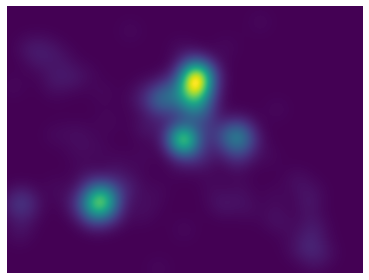

In [13]:
plt.imshow(y_pareidolia['2']['a'])
plt.axis('off')
plt.tight_layout()
plt.savefig('HG_mars_face.png', dpi=600)

In [12]:
dg_faces = []
eg_faces = []
ke = []
correlation_coef_faces = []

for k in x:
    if k in y_faces:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_faces.append(scaler.fit_transform(np.array(x[k])).flatten())
        #eg_faces.append(scaler.fit_transform(np.array(y_faces[k]['a'])).flatten())
        correlation_coef_faces.append(spearmanr(np.array(x[k]).flatten(),
                                                np.array(y_faces[k]['a']).flatten())[0])
        #correlation_coef = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())

    #break

#spearmanr(scaler.fit_transform(cv2.resize(x['1397'], (800, 600))).flatten(), scaler.fit_transform(y_faces['1397']['a']).flatten())[0]

    
# correlation_coef, p_value = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# correlation_coef = np.corrcoef(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

1587
1397
1597
1039
1480
1267
1227
1558
1385
1078
1532
1485
1042
1413
1394
1294
1022
1448
1224
1455
1438
1329
1249
1108
1538
1388
1125
1392
1627
1568
1351
1465
1561
1505
1183
1565
1682
1647
1321
1126
1513
1304
1367
1618
1669
1500
1219
1442
1382
1553
1474
1195
1610
1184
1358
1160
1303
1095
1574
1343
1178
1365
1117
1077
1113
1472
1096
1460
1498
1206
1372
1163
1522
1215
1527
1698
1083
1018
1443
1094
1131
1483
1517
1586
1346
1535
1254
1190
1510
1360
1290
1433
1570
1352
1182
1504
1240
1186
1297
1238


In [13]:
correlation_coef_faces

[0.8112208445652198,
 0.9033720274854865,
 0.7915104256360697,
 0.631516654090288,
 0.7485546324485031,
 0.7323607799896934,
 0.8147625280353542,
 0.8730451612340968,
 0.874180607919581,
 0.7337450129693538,
 0.8949918031224612,
 0.6816650643228453,
 0.7978026216811264,
 0.8176599765630511,
 0.7338680783468714,
 0.6843404696068556,
 0.8729359302795376,
 0.830581513689021,
 0.840833876404041,
 0.8292155547266965,
 0.7602834900729325,
 0.7767962924023897,
 0.8305405743944886,
 0.7825755900756525,
 0.849587323888969,
 0.8049407270050498,
 0.7981924585474149,
 0.8931174554389648,
 0.7790370170807085,
 0.8321606127026091,
 0.8794318603875376,
 0.8237007238863023,
 0.8583350384771676,
 0.8696983656564591,
 0.8277326775456092,
 0.840695101915493,
 0.753400542559853,
 0.7975835878438325,
 0.8034705997014925,
 0.8381421184437553,
 0.87966785835006,
 0.7835479063851398,
 0.6934147726912756,
 0.8631635426208972,
 0.9108274697716726,
 0.8267338946886212,
 0.8349742536231988,
 0.7702549591558276,
 

In [14]:
np.mean(correlation_coef_faces)

0.8191773441234467

In [15]:
np.std(correlation_coef_faces)

0.05881880201869564

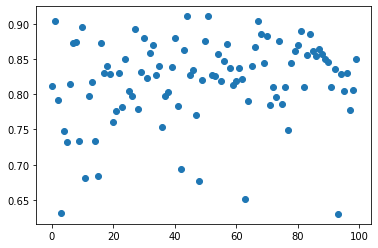

In [16]:
plt.plot(correlation_coef_faces, 'o')

In [17]:
len(correlation_coef_faces)

100

In [18]:
dg_objects = []
eg_objects = []
ke = []
correlation_coef_objects = []

for k in x:
    if k in y_objects:
        print(k)
        ke.append(k)
        #print(np.shape(x[k]))
        #print(y_faces[k])
        #dg_objects.append(np.array(x[k]).flatten())
        #eg_objects.append(np.array(y_objects[k]['a']).flatten())
        correlation_coef_objects.append(spearmanr(np.array(x[k]).flatten(), np.array(y_objects[k]['a']).flatten())[0])

    #break

#correlation_coef, p_value = spearmanr(np.array(dg_objects).flatten(), np.array(eg_objects).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

1458
1324
1153
1143
1400
1209
1093
1109
1118
1416
1471
1262
1288
1266
1234
1293
1557
1645
1239
1559
1065
1337
1016
1149
1654
1383
1642
1363
1387
1079
1043
1317
1040
1644
1120
1029
1087
1275
1541
1523
1426
1624
1699
1487
1638
1245
1516
1353
1015
1449
1612
1658
1144
1673
1316
1492
1520
1556
1410
1210
1548
1423
1428
1062
1314
1554
1049
1281
1001
1690
1092
1347
1499
1476
1306
1067
1151
1192
1489
1469
1369
1488
1651
1393
1105
1589


In [19]:
np.mean(correlation_coef_objects)

0.8379907968755683

In [20]:
np.std(correlation_coef_objects)

0.047560336169958785

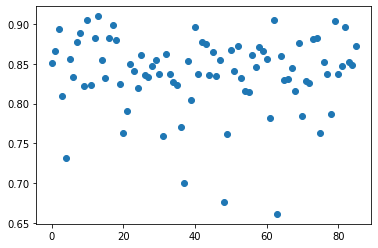

In [21]:
plt.plot(correlation_coef_objects, 'o')

In [22]:
correlation_coef_objects

[0.8512068370184351,
 0.8661824566114178,
 0.8938122887154786,
 0.8091539933327021,
 0.7316043481813179,
 0.8565899831684279,
 0.8340003308121456,
 0.8774152842994909,
 0.8888041323017506,
 0.8228486448585555,
 0.9048870764248425,
 0.8229134242851558,
 0.8822058590032188,
 0.9101348640089005,
 0.8552722873100365,
 0.8328812128681402,
 0.8827297199222639,
 0.8990337610679023,
 0.8805297374664719,
 0.824488503648989,
 0.7626924606561755,
 0.7901098732333437,
 0.8504496183138477,
 0.8405860161435179,
 0.8192786757367786,
 0.8615635657262675,
 0.8363871460606824,
 0.8339711881634598,
 0.8468466832795554,
 0.855541832655932,
 0.8368435935023005,
 0.7586505172939987,
 0.8623702815652567,
 0.8368010574350156,
 0.8277196375099752,
 0.8232075676050925,
 0.770583248541205,
 0.7000324537811116,
 0.8535726392587408,
 0.8046350869452421,
 0.8969615847121017,
 0.8377930310680537,
 0.8772429581922169,
 0.8754239110975454,
 0.8361554358284538,
 0.8656680096429795,
 0.8342192398727469,
 0.8544474897794

In [23]:
len(correlation_coef_objects)

86

In [24]:
dg_pareidolia = []
eg_pareidolia = []
ke = []
correlation_coef_pareidolia = []

for k in x:
    if k in y_pareidolia:
        print(k)
        ke.append(k)
        # print(np.shape(x[k]))
        # print(y_faces[k])
        # dg_pareidolia.append(scaler.fit_transform(np.array(x[k])).flatten())
        # eg_pareidolia.append(scaler.fit_transform(np.array(y_pareidolia[k]['a'])).flatten())
        correlation_coef_pareidolia.append(spearmanr(np.array(x[k]).flatten(), 
                                           np.array(y_pareidolia[k]['a']).flatten())[0])
        
    #break

# correlation_coef, p_value = spearmanr(np.array(dg_pareidolia).flatten(), np.array(eg_pareidolia).flatten())
# correlation_coef = np.corrcoef(a, b)
# print("Correlation coefficient:", correlation_coef)
# print("p-value:", p_value)

67
91
121
75
2
22
56
79
95
20
15
128
72
117
125
147
11
151
36
17
143
60
98
139
76
152
102
27
28
138
66
44
103
111
82
85
106
57
83
146
48
123
64
38
141
81
25
149
150
148
42
97
140
58
127
132
1
157
112
55
154
96
24
159
118
87
21
119
3
74
30
1001
108
131
68
122
113
80
89
78
9
156
49
115
120
39
84
69
153
133
144
110
145
7
35
70
116
126
109
137
50


In [25]:
np.mean(correlation_coef_pareidolia)

0.7950015205892489

In [26]:
np.std(correlation_coef_pareidolia)

0.06948973742287501

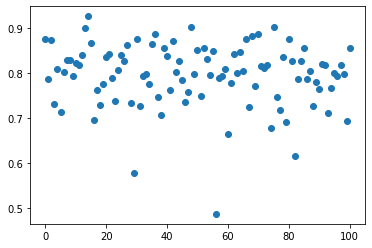

In [27]:
plt.plot(correlation_coef_pareidolia, 'o')

In [28]:
len(correlation_coef_pareidolia)

101

In [29]:
import pandas as pd

# Sample data with different lengths
#correlation_coef_faces = [0.5, 0.6, 0.7]
#correlation_coef_objects = [0.3, 0.4]
#correlation_coef_pareidolia = [0.2, 0.3, 0.1, 0.4]

# Create a DataFrame with a common index
index = range(max(len(correlation_coef_faces), len(correlation_coef_objects), len(correlation_coef_pareidolia)))

data = {
    'sr_f': correlation_coef_faces + [None] * (len(index) - len(correlation_coef_faces)),
    'sr_o': correlation_coef_objects + [None] * (len(index) - len(correlation_coef_objects)),
    'sr_p': correlation_coef_pareidolia + [None] * (len(index) - len(correlation_coef_pareidolia))
}

df = pd.DataFrame(data, index=index)

# Specify the file name
csv_file = 'data.csv'

# Save DataFrame to CSV file
df.to_csv(csv_file)

print(f'Data saved to {csv_file}')


Data saved to data.csv


In [ ]:
import csv

# Sample data
data = [
    ['Name', 'Age', 'City'],
    ['Alice', 28, 'New York'],
    ['Bob', 35, 'Los Angeles'],
    ['Charlie', 22, 'Chicago']
]

# Specify the file name
csv_file = 'data.csv'

# Write data to CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f'Data saved to {csv_file}')


In [15]:
correlation_coef, p_value = spearmanr(np.array(dg_faces).flatten(), np.array(eg_faces).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

Correlation coefficient: 0.6571147833275727
p-value: 0.0


In [16]:
correlation_coef, p_value = spearmanr(np.array(dg_objects).flatten(), np.array(eg_objects).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

Correlation coefficient: 0.6898973951513174
p-value: 0.0


In [17]:
correlation_coef, p_value = spearmanr(np.array(dg_pareidolia).flatten(), np.array(eg_pareidolia).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

Correlation coefficient: 0.6220261768607909
p-value: 0.0


In [ ]:
len(dg_pareidolia)

In [ ]:
len(dg_faces[:83])

In [ ]:
len(dg_objects[:83])

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_faces[:83]).flatten(), np.array(dg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_faces[:83]).flatten(), np.array(dg_pareidolia[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(dg_pareidolia[:83]).flatten(), np.array(dg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_pareidolia[:83]).flatten(), np.array(eg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_pareidolia[:83]).flatten(), np.array(eg_faces[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
correlation_coef, p_value = spearmanr(np.array(eg_faces[:83]).flatten(), np.array(eg_objects[:83]).flatten())
# correlation_coef = np.corrcoef(a, b)
print("Correlation coefficient:", correlation_coef)
print("p-value:", p_value)

In [ ]:
import numpy as np
from scipy.stats import spearmanr

# Generate two arrays with random data
array1 = np.random.rand(100)
array2 = np.random.rand(100)

# Calculate Spearman's correlation coefficient and p-value
correlation, p_value = spearmanr(array1, array2)

print("Spearman's correlation coefficient:", correlation)
print("p-value:", p_value)


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# define two eye gaze heatmaps
heatmap1 = np.array([[0.2, 0.3, 0.1],
                     [0.1, 0.4, 0.3],
                     [0.3, 0.2, 0.1]])

heatmap2 = np.array([[0.1, 0.2, 0.3],
                     [0.2, 0.3, 0.2],
                     [0.3, 0.1, 0.1]])

# flatten the heatmaps into 1D arrays
flat_heatmap1 = heatmap1.flatten()
flat_heatmap2 = heatmap2.flatten()

# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(flat_heatmap1, flat_heatmap2)

print("Correlation coefficient:", corr)
print("p-value:", p_value)


In [ ]:
np.shape(b)

In [ ]:
np.shape(a)

In [ ]:
np.shape(correlation_coef)

In [ ]:
plt.imshow(correlation_coef)

In [ ]:
correlation_coef[83:, :83]

In [ ]:
plt.imshow(correlation_coef[83:, :83])

In [ ]:
plt.plot(np.diagonal(correlation_coef[100:, :100]), 'o') #faces

In [ ]:
np.mean(np.diagonal(correlation_coef[100:, :100]))

In [ ]:
plt.plot(np.diagonal(correlation_coef[100:, :100]), 'o') #obj

In [ ]:
np.mean(np.diagonal(correlation_coef[86:, :86]))

In [ ]:
plt.plot(np.diagonal(correlation_coef[83:, :83]), 'o') #pare

In [ ]:
np.mean(np.diagonal(correlation_coef[83:, :83]))

In [ ]:
plt.imshow(y_objects['1153']['a'])

In [ ]:
y_faces

In [ ]:
np.shape(imgs)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

image = face()

# location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

# load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
# you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
# alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
centerbias_template = np.load('centerbias_mit1003.npy')
# rescale to match image size
centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
# renormalize log density
centerbias -= logsumexp(centerbias)

image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
y_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)

log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs[0].imshow(image)
axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[0].set_axis_off()
axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
axs[1].set_axis_off()

In [ ]:
model.included_fixations

In [ ]:
fixation_history_x

In [ ]:
fixation_history_x[model.included_fixations]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIII(pretrained=True).to(DEVICE)

#image = face()

x = {}

for i in range(len(imgs)):
    
    image = imgs[i]
    
    # location of previous scanpath fixations in x and y (pixel coordinates), starting with the initial fixation on the image.
    fixation_history_x = np.array([1024//2, 300, 500, 200, 200, 700])
    fixation_history_y = np.array([768//2, 300, 100, 300, 100, 500])

    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)
    x_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)
    y_hist_tensor = torch.tensor([fixation_history_x[model.included_fixations]]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor, x_hist_tensor, y_hist_tensor)

    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    axs[0].imshow(image)
    axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()

In [ ]:
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch
import matplotlib.pyplot as plt

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeIIE(pretrained=True).to(DEVICE)

# image = face()

x = {}

for i in range(len(imgs)):
    
    image = imgs[i]
    
    # load precomputed centerbias log density (from MIT1003) over a 1024x1024 image
    # you can download the centerbias from https://github.com/matthias-k/DeepGaze/releases/download/v1.0.0/centerbias_mit1003.npy
    # alternatively, you can use a uniform centerbias via `centerbias_template = np.zeros((1024, 1024))`.
    centerbias_template = np.load('centerbias_mit1003.npy')
    # rescale to match image size
    centerbias = zoom(centerbias_template, (image.shape[0]/centerbias_template.shape[0], image.shape[1]/centerbias_template.shape[1]), order=0, mode='nearest')
    # renormalize log density
    centerbias -= logsumexp(centerbias)

    image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)
    centerbias_tensor = torch.tensor([centerbias]).to(DEVICE)

    log_density_prediction = model(image_tensor, centerbias_tensor)
    
    a = log_density_prediction.detach().cpu().numpy()[0, 0]
    
    x[img_name[i].split('.')[0]] = a
    
    '''
    f, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # axs[0].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[0].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[0].set_axis_off()
    axs[1].matshow(log_density_prediction.detach().cpu().numpy()[0, 0])  # first image in batch, first (and only) channel
    # axs[1].plot(fixation_history_x, fixation_history_y, 'o-', color='red')
    # axs[1].scatter(fixation_history_x[-1], fixation_history_y[-1], 100, color='yellow', zorder=100)
    axs[1].set_axis_off()
    # plt.savefig(os.path.join('DG2_heatmaps', '{0}.jpg'.format(i)))
    '''
    
    #break

In [33]:
image

NameError: name 'image' is not defined

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from scipy.special import logsumexp
import torch

import deepgaze_pytorch

DEVICE = 'cuda'

# you can use DeepGazeI or DeepGazeIIE
model = deepgaze_pytorch.DeepGazeI(pretrained=True).to(DEVICE)

Using cache found in /home/pranjul/.cache/torch/hub/pytorch_vision_v0.6.0


In [31]:
%%capture captured_output
# Your code here
print(model)

In [32]:
with open("DG1_arch.txt", "w") as f:
    f.write(captured_output.stdout)
